In [31]:
# Instalação da API do Kaggle para garantir a reprodução do projeto.

!pip install kaggle

In [32]:
# Listando as bases de dados disponíveis no Kaggle

!kaggle datasets list

ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                          Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114        226                1  
ahmeduzaki/wind-and-solar-energy-production-dataset               Wind & Solar Energy Production Dataset                  395372  2026-01-02 21:06:22.780000              0         44                1  
kundanbedmutha/exam-score-prediction-dataset                      Exam Score Prediction Dataset                           325454  2025-11-28 07:29:01.047000           5863        266          

In [33]:
# Importando a chave da API pra não precisar digitar a chave diretamente código

import os
os.environ.get("KAGGLE_API_TOKEN")

In [34]:
import os

from kaggle.api.kaggle_api_extended import KaggleApi

# 1. Instanciando e Autenticando
api = KaggleApi()
api.authenticate()

# 2. Escolhido o dataset "churn-modelling"
DATASET = "shrutimechlearn/churn-modelling"
DATA_DIR = "data"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

api.dataset_download_files(DATASET, path=DATA_DIR, unzip=True)

print(f"Sucesso! O dataset {DATASET} foi baixado na pasta '{DATA_DIR}'.")


Dataset URL: https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling
Sucesso! O dataset shrutimechlearn/churn-modelling foi baixado na pasta 'data'.


In [35]:
import pandas as pd

# Carregando os dados
df = pd.read_csv('data/Churn_Modelling.csv')

# Visualizando as primeiras linhas e informações gerais
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
# Removendo colunas irrelevantes para o modelo
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [37]:
display(df.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
#Importando biblioteca paa visualização

import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual dos gráficos
sns.set_theme(style="whitegrid")

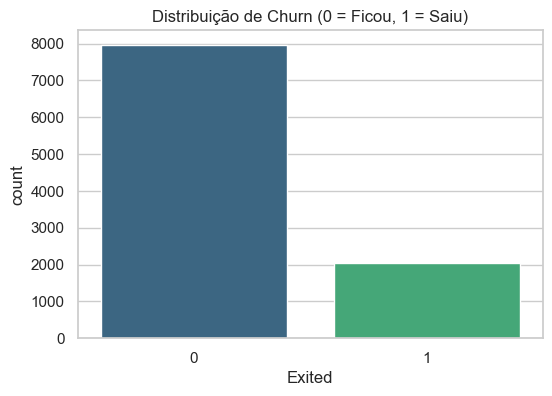

Porcentagem de Churn: 20.37%


In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', hue='Exited', data=df, palette='viridis', legend=False)
plt.title('Distribuição de Churn (0 = Ficou, 1 = Saiu)')
plt.show()

print(f"Porcentagem de Churn: {df['Exited'].mean()*100:.2f}%")

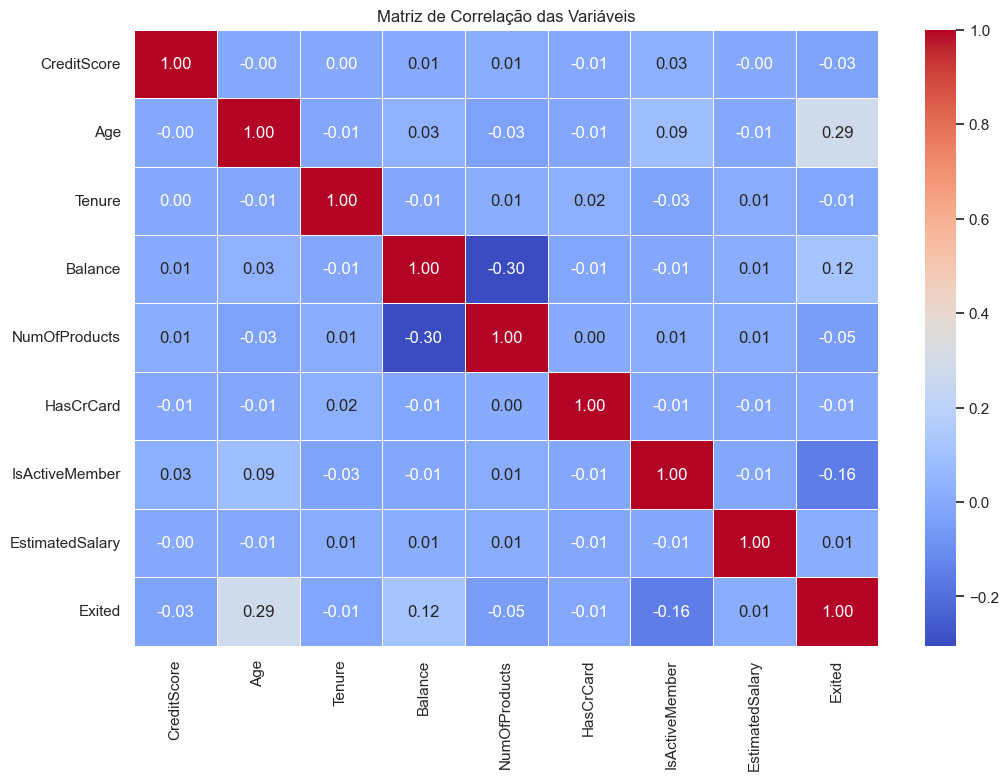

In [40]:
import numpy as np

# Selecionar apenas colunas numéricas para a correlação
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

In [41]:
# Criando variáveis dummy para Geography e Gender
# drop_first=True evita a 'armadilha da multicolinearidade' (ex: se não é Homem, é Mulher)
df_final = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Verificando as novas colunas
print(df_final.columns)
df_final.head()

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [42]:
# X contém todas as colunas, exceto a que vamos prever
X = df_final.drop('Exited', axis=1)

# y contém apenas a coluna alvo
y = df_final['Exited']

In [43]:
# Para garantir a capacidade de generalização do modelo, dividi o dataset em 80% para treinamento e 20% para teste. 
# Utilizei o random_state para assegurar a reprodutibilidade dos experimentos, 
# permitindo que os resultados de acurácia sejam consistentes em futuras execuções

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dados de Treino: {X_train.shape[0]} amostras")
print(f"Dados de Teste: {X_test.shape[0]} amostras")

Dados de Treino: 8000 amostras
Dados de Teste: 2000 amostras


In [44]:
# Utilizei o StandardScaler para normalizar as variáveis numéricas, evitando vieses de escala. 
# O modelo escolhido foi o Random Forest com 100 estimadores (árvore de decisão), 
# que é um excelente ponto de equilíbrio entre precisão e velocidade de processamento
# treinado com 80% dos dados para garantir uma base sólida de aprendizado antes da validação final

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustamos o scaler nos dados de treino e transformamos ambos
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Utilizei o parâmetro random_state=42 para garantir a reprodutibilidade científica do experimento. 
# Isso assegura que a separação dos dados entre treino e teste, bem como a inicialização das 100 árvores do Random Forest, sejam consistentes, 
# permitindo que outros analistas cheguem aos mesmos resultados de métricas apresentados neste projeto

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inicializando o modelo com 100 árvores
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinamento (A IA estuda os dados de treino)
modelo_rf.fit(X_train, y_train)

# Previsão (A IA tenta adivinhar quem sai nos dados de teste que ela nunca viu)
y_pred = modelo_rf.predict(X_test)

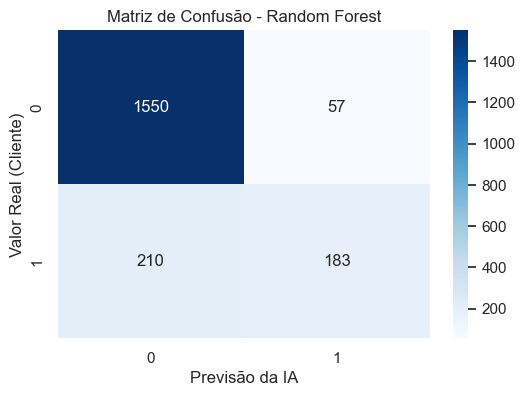

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [46]:
# Criando a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão da IA')
plt.ylabel('Valor Real (Cliente)')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

# Relatório de métricas (Precisão, Recall e F1-Score)
print(classification_report(y_test, y_pred))

In [47]:
# A Matriz de Confusão revela que o modelo Random Forest alcançou uma alta performance na identificação de clientes que permanecem 
# na instituição (1.550 acertos). No entanto, ao analisarmos o cenário de Churn, o modelo identificou com sucesso 183 clientes que realmente saíram, 
# enquanto 210 clientes que cancelaram suas contas não foram detectados pelo modelo (Falsos Negativos). 
# Atualmente, temos uma acurácia global de 87%, o que nos dá uma base sólida para prever comportamentos gerais da carteira


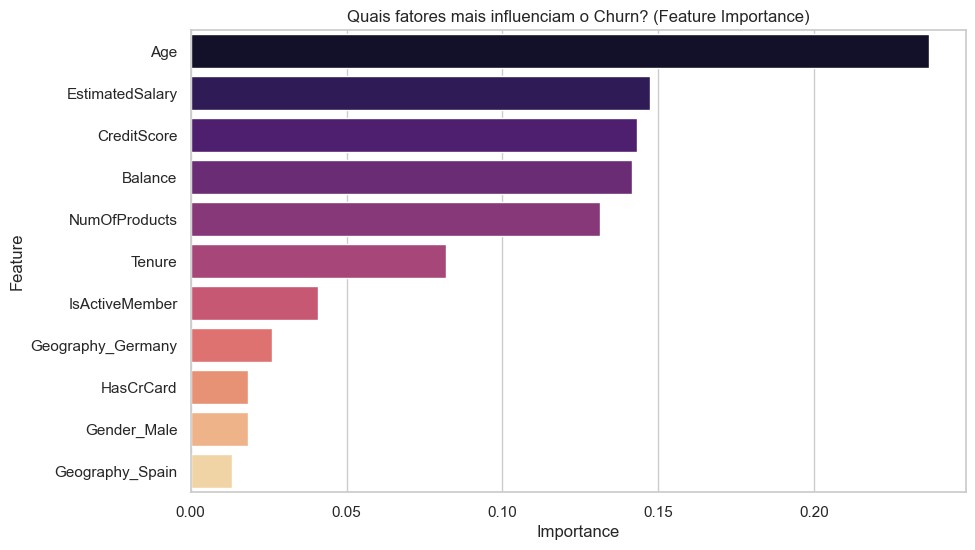

In [48]:
# Cálculo da importância das variáveis
importances = modelo_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df, 
    palette='magma', 
    hue='Feature', 
    legend=False
)

plt.title('Quais fatores mais influenciam o Churn? (Feature Importance)')
plt.show()

In [49]:
# A análise de importância das variáveis revelou que a Idade e o Salário são os principais gatilhos de Churn. 
# Por isso se fosse um caso real seria interessante que o banco criasse campanhas de fidelização específicas para o público sênior e 
# revisasse as taxas para clientes com alto saldo, que são os que apresentam maior risco de saída